In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PATH='/content/drive/MyDrive/skin_disease'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
image_size = (128, 128)  # resize all images
num_classes = 7

In [ ]:
class_names = sorted(os.listdir(PATH))
print("Class Labels:", class_names)

Class Labels: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Psoriasis pictures Lichen Planus and related diseases', 'Vascular Tumors']


In [ ]:
images = []
labels = []

# load images and labels
for label, disease in enumerate(class_names):
    disease_path = os.path.join(PATH, disease)

    for img_file in tqdm(os.listdir(disease_path), desc=f"Loading {disease}"):
        img_path = os.path.join(disease_path, img_file)

        # read and resize image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
        image = cv2.resize(image, image_size)

        images.append(image)
        labels.append(label)

Loading Acne and Rosacea Photos: 100%|██████████| 882/882 [00:15<00:00, 56.13it/s]
Loading Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 100%|██████████| 1437/1437 [00:30<00:00, 46.73it/s] 
Loading Eczema Photos: 100%|██████████| 1544/1544 [00:33<00:00, 46.01it/s]
Loading Lupus and other Connective Tissue diseases: 100%|██████████| 525/525 [00:07<00:00, 66.73it/s] 
Loading Melanoma Skin Cancer Nevi and Moles: 100%|██████████| 579/579 [00:09<00:00, 58.68it/s]
Loading Psoriasis pictures Lichen Planus and related diseases: 100%|██████████| 927/927 [00:16<00:00, 55.20it/s]
Loading Vascular Tumors: 0it [00:00, ?it/s]


In [ ]:
images = np.array(images) / 255.0  # normalize
labels = np.array(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Training Samples: {len(x_train)}, Testing Samples: {len(x_test)}")

Training Samples: 4715, Testing Samples: 1179


In [ ]:
#cnn model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # prevent overfitting
    layers.Dense(num_classes, activation="softmax")  # output layer
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.2855 - loss: 1.7936 - val_accuracy: 0.4071 - val_loss: 1.5315
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.3735 - loss: 1.5838 - val_accuracy: 0.4063 - val_loss: 1.4961
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.3811 - loss: 1.5382 - val_accuracy: 0.4063 - val_loss: 1.4944
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.4226 - loss: 1.4719 - val_accuracy: 0.4249 - val_loss: 1.4389
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.4484 - loss: 1.4024 - val_accuracy: 0.4258 - val_loss: 1.5286
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.4692 - loss: 1.3455 - val_accuracy: 0.4656 - val_loss: 1.3962
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.5072 - loss: 1.2773 - val_accuracy: 0.4572 - val_loss: 1.4145
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.5050 - loss: 1.2375 - val_accu

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/skin_disease_model.h5"

model.save(MODEL_PATH)
print(f"Model saved at {MODEL_PATH}")

Model saved at /content/drive/MyDrive/skin_disease_model.h5


In [ ]:
model = tf.keras.models.load_model(MODEL_PATH)

# function to predict skin disease
def predict_skin_disease(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    image = np.expand_dims(image, axis=0) / 255.0

    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)

    confidence_score = np.max(predictions)

    print(f"Predicted Disease: {class_names[predicted_class]}")
    print(f"Confidence Score: {confidence_score:.2f}")

test_image_path = "/content/drive/MyDrive/test.jpg"
predict_skin_disease(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Disease: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Confidence Score: 0.87


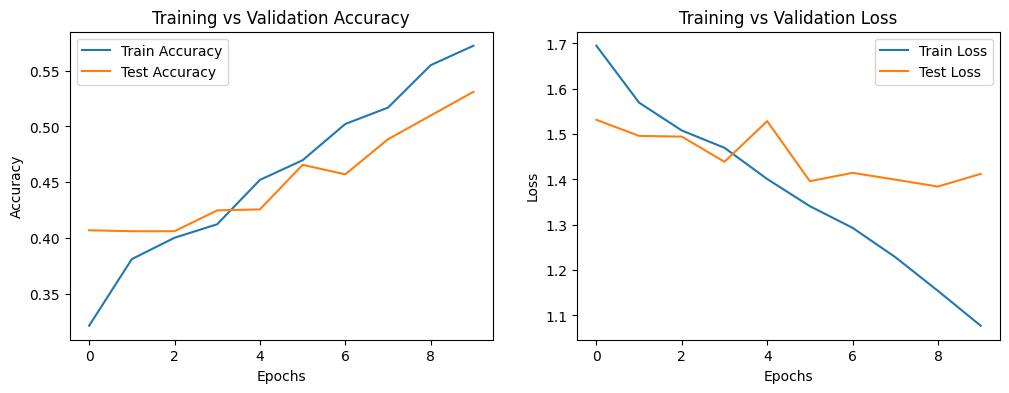

In [ ]:
plt.figure(figsize=(12, 4))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

In [ ]:
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('model.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
